# Figure 3: iModulon Examples

## Setup

In [1]:
from os import path
import seaborn as sns
import matplotlib.pyplot as plt

from pymodulon.io import load_json_model
from pymodulon.plotting import *

### Load data

In [3]:
figure_dir = '../../figures/panel3'
data_dir = path.join('../..','data','processed')

In [4]:
data_file = path.join(data_dir,'salb.json.gz')
ica_data = load_json_model(data_file)

# Panel A: Early Biofilm iModulon

/Users/nilmat/miniconda3/envs/preprint/lib/python3.10/site-packages/pymodulon/plotting.py:836: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  mod_cogs = ica_data.gene_table.loc[component_genes].COG


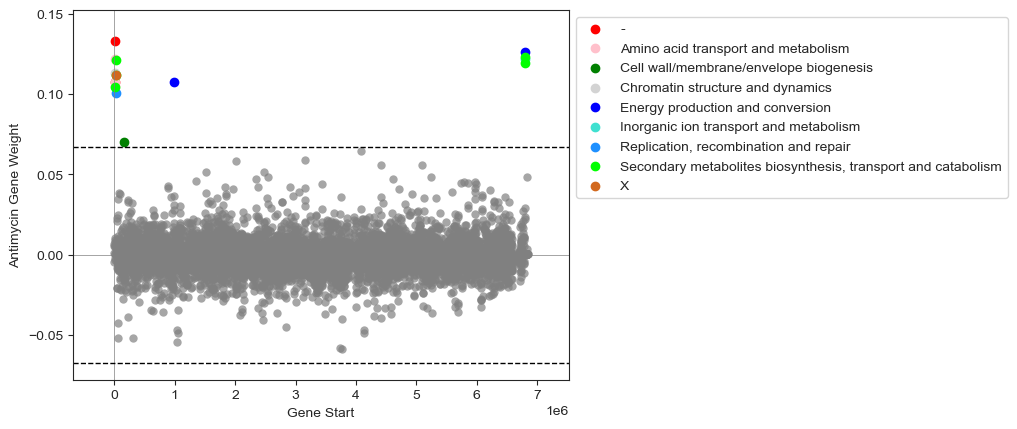

In [5]:
plot_gene_weights(ica_data,'Antimycin',show_labels=False,label_font_kwargs={'fontsize':6})
plt.savefig(path.join(figure_dir,'Antimycin_genes.pdf'))

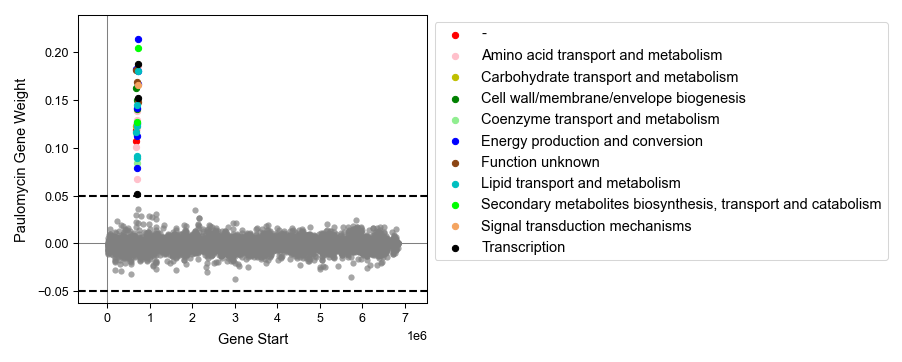

In [12]:
plot_gene_weights(ica_data,'Paulomycin',show_labels=False,label_font_kwargs={'fontsize':6})
plt.savefig(path.join(figure_dir,'Paulomycin_genes.pdf'))

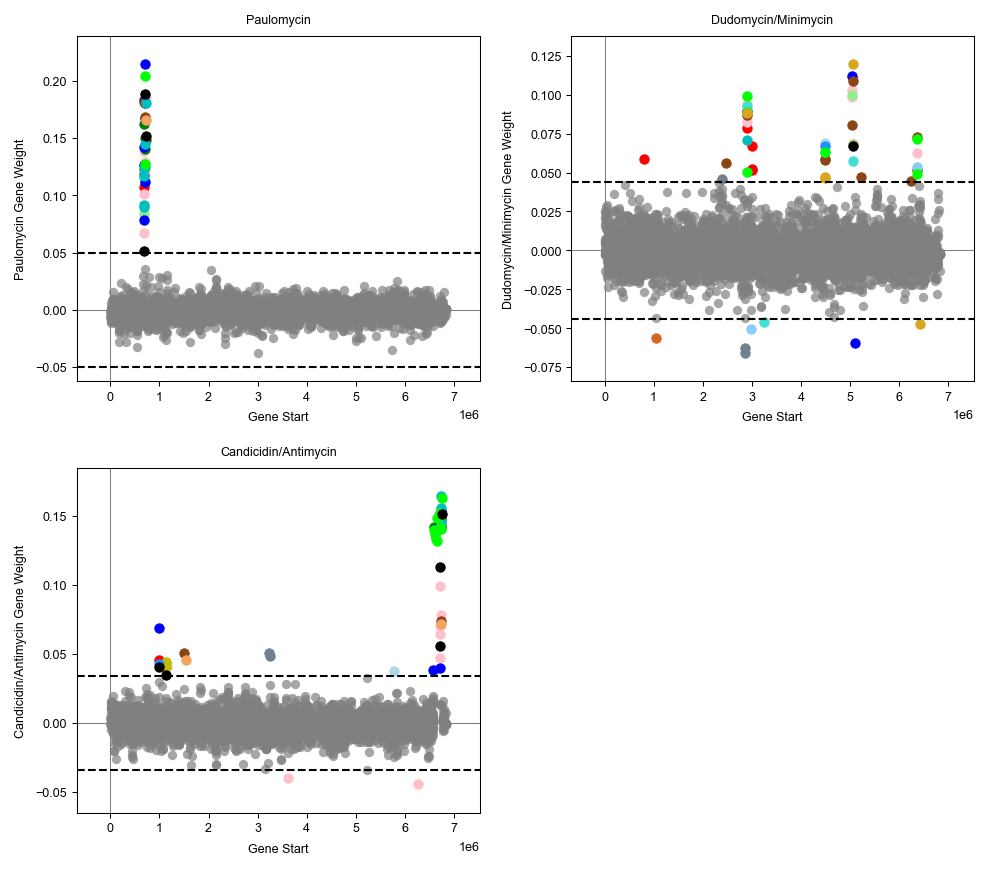

In [71]:
# Set the svg.fonttype parameter to 'none'
plt.rcParams['svg.fonttype'] = 'none'

# Convert the page size from mm to inches
width = 170 / 25.4  # ~6.69 inches
height = 150 / 25.4  # ~3.94 inches

# Define a list of imodulons
imodulons = ['Paulomycin', 'Dudomycin/Minimycin', 'Candicidin/Antimycin']

# Create a grid of subplots with two columns
fig, axs = plt.subplots(len(imodulons)//2 + len(imodulons)%2, 2, figsize=(width, height))

# Loop over the subplots and plot the gene weights
for i, ax in enumerate(axs.flat):
    if i < len(imodulons):
        plot_gene_weights(ica_data, imodulons[i], show_labels=False, label_font_kwargs={'fontsize':6}, ax=ax, legend=False, scatter_kwargs={'s': 20})
        ax.set_title(imodulons[i], fontsize=6)

        # Increase x and y axis text size
        ax.tick_params(axis='both', which='major', labelsize=6)

        # Increase x and y axis label size
        ax.set_xlabel(ax.get_xlabel(), fontsize=6)
        ax.set_ylabel(ax.get_ylabel(), fontsize=6)
    else:
        ax.axis('off')  # Hide unused subplots

plt.tight_layout()
plt.savefig(path.join(figure_dir,'panel3.svg'), dpi=300)
plt.show()

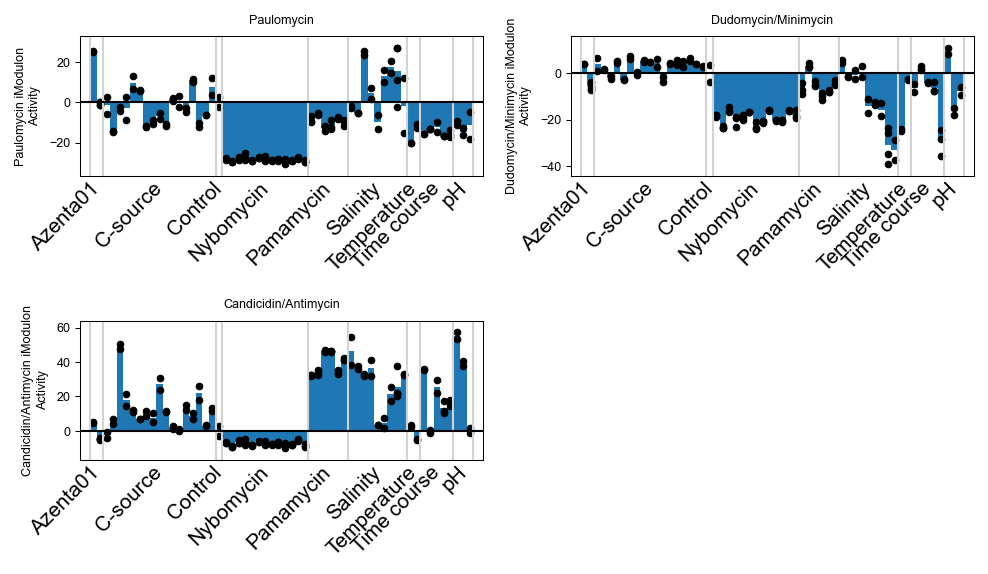

In [72]:
# Set the svg.fonttype parameter to 'none'
plt.rcParams['svg.fonttype'] = 'none'

# Convert the page size from mm to inches
width = 170 / 25.4  # ~6.69 inches
height = 100 / 25.4  # ~3.94 inches

# Define a list of imodulons
imodulons = ['Paulomycin', 'Dudomycin/Minimycin', 'Candicidin/Antimycin']

# Create a grid of subplots with two columns
fig, axs = plt.subplots(len(imodulons)//2 + len(imodulons)%2, 2, figsize=(width, height))

# Loop over the subplots and plot the activities
for i, ax in enumerate(axs.flat):
    if i < len(imodulons):
        plot_activities(ica_data, imodulons[i], ax=ax)
        ax.set_title(imodulons[i], fontsize=6)

        # Increase x and y axis text size
        ax.tick_params(axis='both', which='major', labelsize=6)

        # Increase x and y axis label size
        ax.set_xlabel(ax.get_xlabel(), fontsize=6)
        ax.set_ylabel(ax.get_ylabel(), fontsize=6)

        # Remove legend
        if ax.get_legend():
            ax.get_legend().remove()
    else:
        ax.axis('off')  # Hide unused subplots

plt.tight_layout()
plt.savefig(path.join(figure_dir,'combined_activities.svg'), dpi=300)
plt.show()

/Users/nilmat/miniconda3/envs/imodulon/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


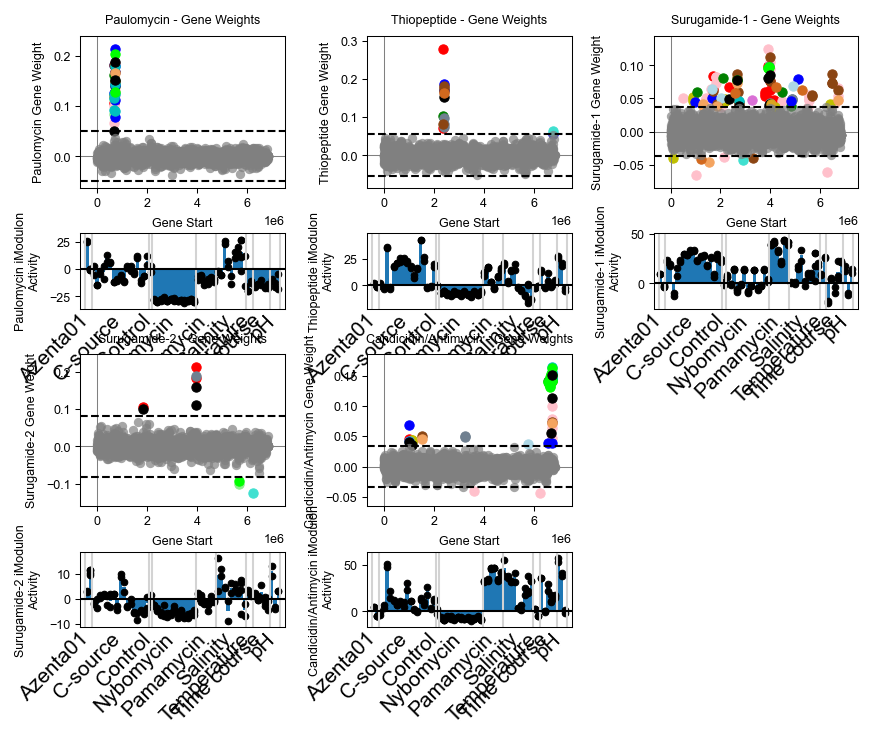

In [46]:
from matplotlib import gridspec

# Define a list of imodulons
imodulons = ['Paulomycin', 'Thiopeptide', 'Surugamide-1', 'Surugamide-2', 'Candicidin/Antimycin']

# Convert the page size from mm to inches
width = 170 / 25.4  # ~6.69 inches
height = 200 / 25.4  # ~7.87 inches

fig = plt.figure(figsize=(width, height))

# Define the height ratios for the subplots and adjust the space between subplots
gs = gridspec.GridSpec(6, 3, height_ratios=[2, 1]*3, wspace=0.4, hspace=0.4)

# Loop over the imodulons and plot the gene weights and activities
for i, imodulon in enumerate(imodulons):
    # Plot gene weights
    ax = plt.subplot(gs[i//3*2, i%3])
    plot_gene_weights(ica_data, imodulon, show_labels=False, label_font_kwargs={'fontsize':6}, ax=ax, legend=False, scatter_kwargs={'s': 20})
    ax.set_title(imodulon + ' - Gene Weights', fontsize=6)

    # Set x and y axis text size
    ax.tick_params(axis='both', which='major', labelsize=6)

    # Set x and y axis label size
    ax.set_xlabel(ax.get_xlabel(), fontsize=6)
    ax.set_ylabel(ax.get_ylabel(), fontsize=6)

    # Plot activities
    ax = plt.subplot(gs[i//3*2+1, i%3])
    plot_activities(ica_data, imodulon, ax=ax)

    # Set x and y axis text size
    ax.tick_params(axis='both', which='major', labelsize=6)

    # Set x and y axis label size
    ax.set_xlabel(ax.get_xlabel(), fontsize=6)
    ax.set_ylabel(ax.get_ylabel(), fontsize=6)

    # Adjust x labels size
    for label in ax.get_xticklabels():
        label.set_fontsize(6)

    # Remove legend
    if ax.get_legend():
        ax.get_legend().remove()

plt.tight_layout()
plt.savefig(path.join(figure_dir,'combined_plots.png'), dpi=300)
plt.show()

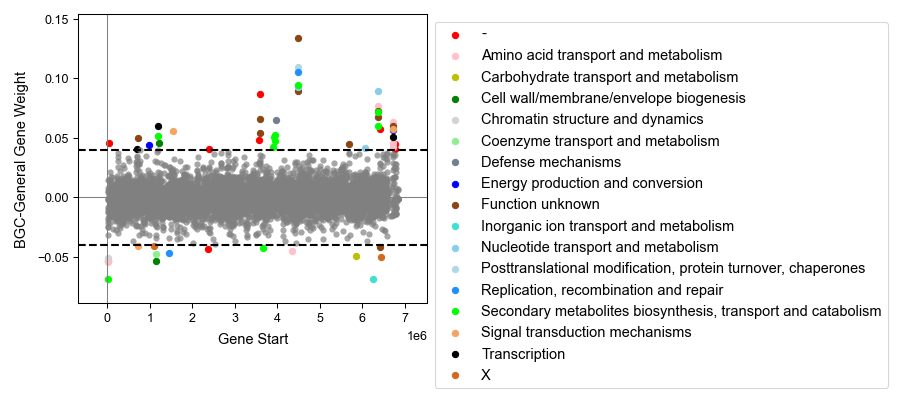

In [73]:
plot_gene_weights(ica_data,'BGC-General',show_labels=False,label_font_kwargs={'fontsize':6})
plt.savefig(path.join(figure_dir,'bgc_general_genes.pdf'))

# BGCs/Surugamide 

Make a table to summarize the BGC related iModulons

In [153]:
import pandas as pd

# Load the CSV files into pandas DataFrames
df_bgc = pd.read_csv("/Users/nilmat/Documents/Streptomyces_main/BiGMeC_salb/S_albus_antismash/bgc_gene_list.csv")
df_imodulon = pd.read_csv("/Users/nilmat/Documents/streptsd/data/processed/modulome/genes_with_imodulon.csv")

# Rename 'locus_tag' to 'gene_id' in df_imodulon
df_imodulon = df_imodulon.rename(columns={'locus_tag':'gene_id'})

# Merge the DataFrames
df_merged = pd.merge(df_bgc, df_imodulon, on="gene_id", how="outer")

# Convert 'Imodulon' and 'BGC' to categorical strings
df_merged['Imodulon'] = df_merged['Imodulon'].astype(str)
df_merged['BGC'] = df_merged['BGC'].astype(str)

# Remove rows where 'BGC' is 'nan'
df_merged = df_merged[df_merged.BGC != 'nan']

# view BGC 14.0 and imodulon Surugamide-1
df_merged[df_merged.BGC == '14.0']


,gene_id,BGC,Imodulon
364,XNR_RS17000,14.0,nan
365,XNR_RS17005,14.0,nan
366,XNR_RS17010,14.0,nan
367,XNR_RS17015,14.0,UC-13
368,XNR_RS17020,14.0,nan
369,XNR_RS17025,14.0,nan
370,XNR_RS17030,14.0,nan
371,XNR_RS17035,14.0,nan
372,XNR_RS17040,14.0,nan
373,XNR_RS17045,14.0,nan


In [151]:
# Initialize an empty DataFrame with the desired columns
df = pd.DataFrame(columns=['BGC', 'iModulon', 'Coverage', 'Co-regulated genes'])

# List of iModulons
iModulons = ['Paulomycin', 'Surugamide-1', 'Surugamide-2', 'Candicidin/Antimycin', 'Antimycin', 'SGR PTM', 'Dudomycin/Minimycin', 'NRPS-1', 'Thiopeptide', 'Cyclofaulknamycin-1', 'SAL-2242', 'Cyclofaulknamycin-2']  # replace with your list of iModulons

# Iterate over the list of iModulons
for imodulon in iModulons:
    max_coverage = 0
    max_bgc = None
    
    # Iterate over all BGCs
    for bgc in df_merged['BGC'].unique():
        # Get the subset of df_merged for the current BGC
        df_bgc_subset = df_merged[df_merged['BGC'] == bgc]
        
        # Calculate the total number of genes in the BGC
        total_genes = df_bgc_subset.shape[0]
        
        # Calculate the number of genes in the intersection of the BGC and the iModulon
        intersection_genes = df_bgc_subset[df_bgc_subset['Imodulon'] == imodulon].shape[0]
        
        # Calculate the coverage
        coverage = (intersection_genes / total_genes)*100 if total_genes > 0 else 0
        
        # Check if the coverage is the highest for this iModulon
        if coverage > max_coverage:
            max_coverage = coverage
            max_bgc = bgc
    
    # Append the information to the DataFrame
    df = df.append({'BGC': max_bgc, 'iModulon': imodulon, 'Coverage': max_coverage, 'Co-regulated genes': ''}, ignore_index=True)

# sort the dataframe by iModulon name
df = df.sort_values(by=['iModulon'])

df.to_csv('../../../../Desktop/preprint_figs/panel3/bgc_coverage.csv')

In [149]:
ica_data.view_imodulon('Paulomycin')

,gene_weight,gene_name,eggNOG_OGs,Description,GOs,EC,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,...,BiGG_Reaction,PFAMs,accession,old_locus_tag,start,end,strand,gene_product,COG,operon
XNR_RS02820,0.162331,rmlC,"COG1898@1|root,COG1898@2|Bacteria,2GMW4@201174...",Catalyzes the epimerization of the C3' and C5'...,-,5.1.3.13,"ko:K01790,ko:K16438","ko00404,ko00521,ko00523,ko01055,ko01130,map004...","M00793,M00798,M00799,M00800","R06433,R06514,R06628,R08934,R11046,R11138",...,-,dTDP_sugar_isom,NC_020990.1,XNR_0573,674513,675115,-,dTDP-4-dehydrorhamnose 3%2C5-epimerase,Cell wall/membrane/envelope biogenesis,Op425
XNR_RS02825,0.181467,XNR_RS02825,"COG4122@1|root,COG4122@2|Bacteria,2IA2G@201174...",Macrocin-O-methyltransferase (TylF),-,-,"ko:K19856,ko:K21325","ko00523,ko01130,map00523,map01130",M00799,"R11041,R11469",...,-,"Methyltransf_24,TylF",NC_020990.1,XNR_0574,675172,675945,-,dTDP-6-deoxy-L-hexose 3-O-methyltransferase,Function unknown,Op426
XNR_RS02830,0.182702,eryBII,"COG0667@1|root,COG0667@2|Bacteria,2GMNA@201174...",aldo keto reductase,-,-,ko:K13315,"ko00523,ko01130,map00523,map01130","M00798,M00799","R11051,R11474",...,-,Aldo_ket_red,NC_020990.1,XNR_0575,676002,677039,-,aldo/keto reductase,Energy production and conversion,Op427
XNR_RS02835,0.101103,XNR_RS02835,"COG2303@1|root,COG2303@2|Bacteria,2GUQ4@201174...",GMC oxidoreductase,-,-,-,-,-,-,...,-,"GMC_oxred_C,GMC_oxred_N",NC_020990.1,XNR_0576,677156,678739,-,GMC oxidoreductase,Amino acid transport and metabolism,Op428
XNR_RS30670,0.107107,XNR_RS30670,"2B75Q@1|root,3207F@2|Bacteria,2IQM5@201174|Act...",-,-,-,-,-,-,-,...,-,-,NC_020990.1,XNR_0577,678714,679157,-,hypothetical protein,-,Op429
XNR_RS02840,0.116783,XNR_RS02840,"COG1960@1|root,COG1960@2|Bacteria,2GIX8@201174...",acyl-CoA dehydrogenase,-,-,-,-,-,-,...,-,"Acyl-CoA_dh_1,Acyl-CoA_dh_M,Acyl-CoA_dh_N",NC_020990.1,XNR_0578,679181,680323,-,acyl-CoA dehydrogenase family protein,Lipid transport and metabolism,Op429
XNR_RS02845,0.114956,XNR_RS02845,"COG2091@1|root,COG2091@2|Bacteria",lysine biosynthetic process via aminoadipic acid,-,2.7.8.7,"ko:K00997,ko:K06133","ko00770,map00770",-,R01625,...,-,ACPS,NC_020990.1,XNR_0579,680353,681036,-,4'-phosphopantetheinyl transferase superfamily...,Coenzyme transport and metabolism,Op429
XNR_RS02850,0.122830,XNR_RS02850,"COG0235@1|root,COG0235@2|Bacteria,2GJ8W@201174...",Class II aldolase,-,4.1.2.17,ko:K01628,"ko00051,ko01120,map00051,map01120",-,R02262,...,-,Aldolase_II,NC_020990.1,XNR_0580,681033,681782,-,class II aldolase/adducin family protein,Carbohydrate transport and metabolism,Op429
XNR_RS02855,0.122607,XNR_RS02855,"COG0289@1|root,COG0289@2|Bacteria,2IM1W@201174...","Dihydrodipicolinate reductase, C-terminus",-,1.17.1.8,ko:K00215,"ko00261,ko00300,ko01100,ko01110,ko01120,ko0113...","M00016,M00525,M00526,M00527","R04198,R04199",...,-,"DapB_C,DapB_N",NC_020990.1,XNR_0581,681779,682531,-,dihydrodipicolinate reductase,Amino acid transport and metabolism,Op429
XNR_RS02860,0.118118,XNR_RS02860,"2B3BY@1|root,31W0G@2|Bacteria,2GWH3@201174|Act...",-,-,-,-,-,-,-,...,-,PP-binding,NC_020990.1,XNR_0582,682524,682820,-,hypothetical protein,-,Op429


# surugamide gene weights

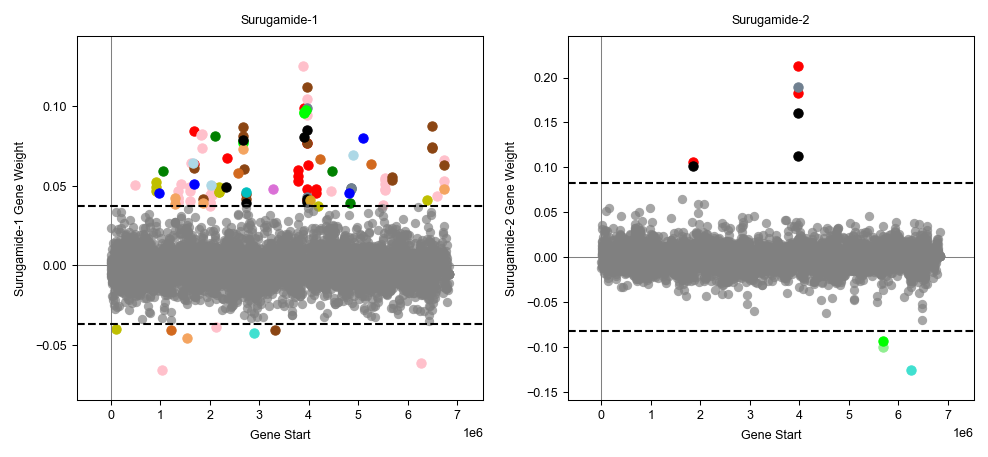

In [77]:
# Set the svg.fonttype parameter to 'none'
plt.rcParams['svg.fonttype'] = 'none'

# Convert the page size from mm to inches
width = 170 / 25.4  # ~6.69 inches
height = 80 / 25.4  # ~3.94 inches

# Define a list of imodulons
imodulons = ['Surugamide-1', 'Surugamide-2']

# Create a grid of subplots with two columns
fig, axs = plt.subplots(len(imodulons)//2 + len(imodulons)%2, 2, figsize=(width, height))

# Loop over the subplots and plot the gene weights
for i, ax in enumerate(axs.flat):
    if i < len(imodulons):
        plot_gene_weights(ica_data, imodulons[i], show_labels=False, label_font_kwargs={'fontsize':6}, ax=ax, legend=False, scatter_kwargs={'s': 20})
        ax.set_title(imodulons[i], fontsize=6)

        # Increase x and y axis text size
        ax.tick_params(axis='both', which='major', labelsize=6)

        # Increase x and y axis label size
        ax.set_xlabel(ax.get_xlabel(), fontsize=6)
        ax.set_ylabel(ax.get_ylabel(), fontsize=6)
    else:
        ax.axis('off')  # Hide unused subplots

plt.tight_layout()
plt.savefig(path.join(figure_dir,'panel4.svg'), dpi=300)
plt.show()

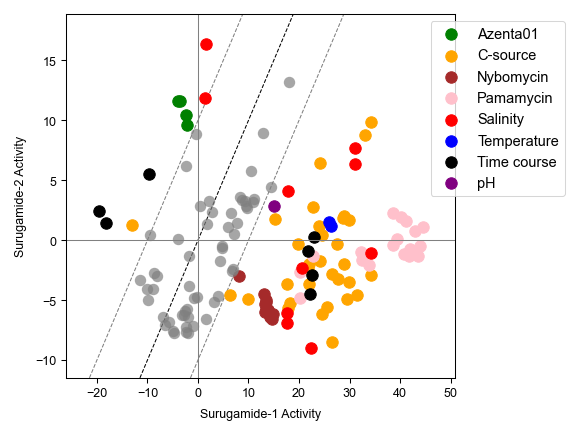

In [86]:
# Convert the page size from mm to inches
width = 85 / 25.4  # ~6.69 inches
height = 80 / 25.4  # ~3.94 inches

fig,ax = plt.subplots(figsize=(width, height))

# Create a dictionary where the keys are the sample IDs and the values are the project names
groups = ica_data.sample_table['project'].to_dict()

compare_activities(ica_data,'Surugamide-1','Surugamide-2',
                   ax=ax,
                   line45=True,
                   fit_metric=None,
                   line45_margin=10,
                   groups=groups,
                   colors=['green','orange', 'purple', 'red', 'blue', 'black', 'brown', 'pink'],
                   scatter_kwargs={'s': 30})  # Increase dot size

# Increase x and y axis text size
ax.tick_params(axis='both', which='major', labelsize=6)

# Increase the x and y-axis label size
ax.set_xlabel('Surugamide-1 Activity', fontsize=6)
ax.set_ylabel('Surugamide-2 Activity', fontsize=6)

# Move the legend to the top right outside the plot
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.savefig(path.join(figure_dir,'surugamide_phase.svg'))

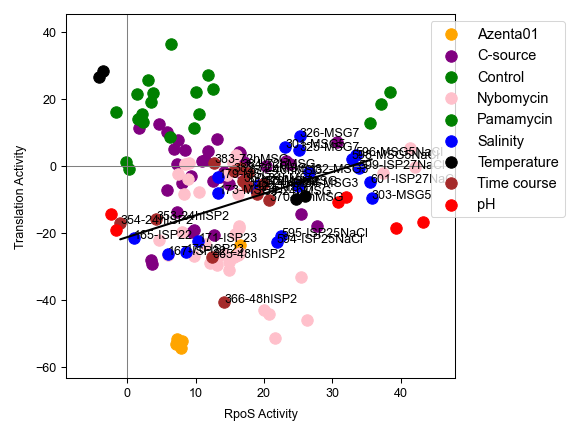

In [156]:
import matplotlib.pyplot as plt

# Convert the page size from mm to inches
width = 85 / 25.4  # ~6.69 inches
height = 80 / 25.4  # ~3.94 inches

fig, ax = plt.subplots(figsize=(width, height))

# Create a dictionary where the keys are the sample IDs and the values are the project names
groups = ica_data.sample_table['project'].to_dict()

compare_activities(ica_data,'RpoS','Translation',
                   ax=ax,
                   line45=False,
                   fit_metric=None,
                   line45_margin=10,
                   groups=groups,
                   colors=['green','orange', 'purple', 'red', 'blue', 'black', 'brown', 'pink'],
                   scatter_kwargs={'s': 30})  # Increase dot size

# Get the rows for 'Surugamide-1' and 'Surugamide-2'
# Get the rows for 'Surugamide-1' and 'Surugamide-2'
surugamide_1 = ica_data.A.loc['RpoS']
surugamide_2 = ica_data.A.loc['Translation']

# Prepare lists to store x and y values
x_values = []
y_values = []

# Loop over the columns in the DataFrame (these are the sample names)
for sample in ica_data.A.columns:
    # Check if the sample belongs to the 'Salinity' or 'Time course' group
    if groups[sample] in ['Salinity', 'Time course']:
        # Get the values for this sample
        x = surugamide_1[sample]
        y = surugamide_2[sample]
        
        # Add the values to the lists
        x_values.append(x)
        y_values.append(y)
        
        # Add a label for each point
        ax.annotate(sample, (x, y), fontsize=6)

# Fit a line to the data
coefficients = np.polyfit(x_values, y_values, 1)
polynomial = np.poly1d(coefficients)

# Generate x values for the line
x_line = np.linspace(min(x_values), max(x_values), 100)

# Generate y values for the line
y_line = polynomial(x_line)

# Plot the line
ax.plot(x_line, y_line, color='black')

# Increase x and y axis text size
ax.tick_params(axis='both', which='major', labelsize=6)

# Increase the x and y-axis label size
ax.set_xlabel('RpoS Activity', fontsize=6)
ax.set_ylabel('Translation Activity', fontsize=6)

# Move the legend to the top right outside the plot
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

#plt.savefig(path.join(figure_dir,'surugamide_phase2.svg'))

<AxesSubplot:ylabel='XNR_RS07685 Expression'>

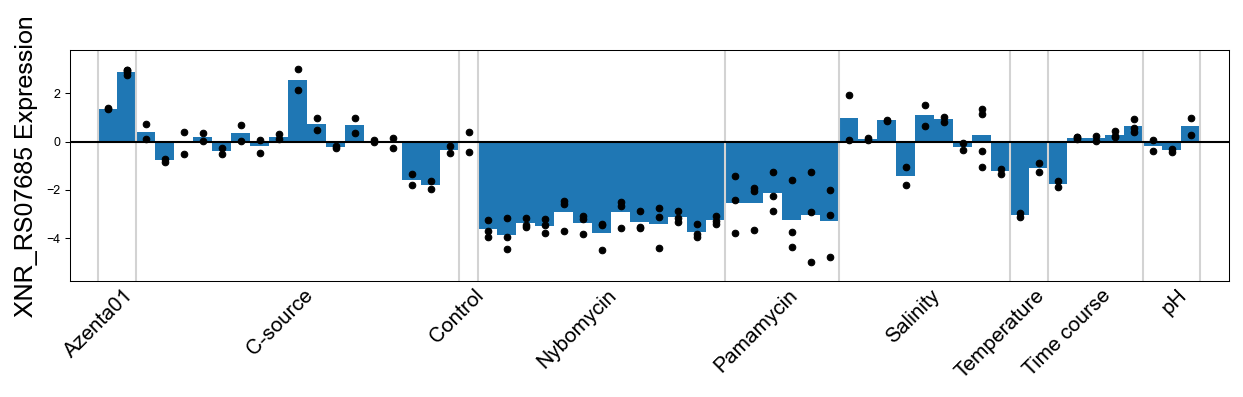

In [94]:
plot_expression(ica_data,'XNR_RS07685')

<AxesSubplot:ylabel='XNR_RS17125 Expression'>

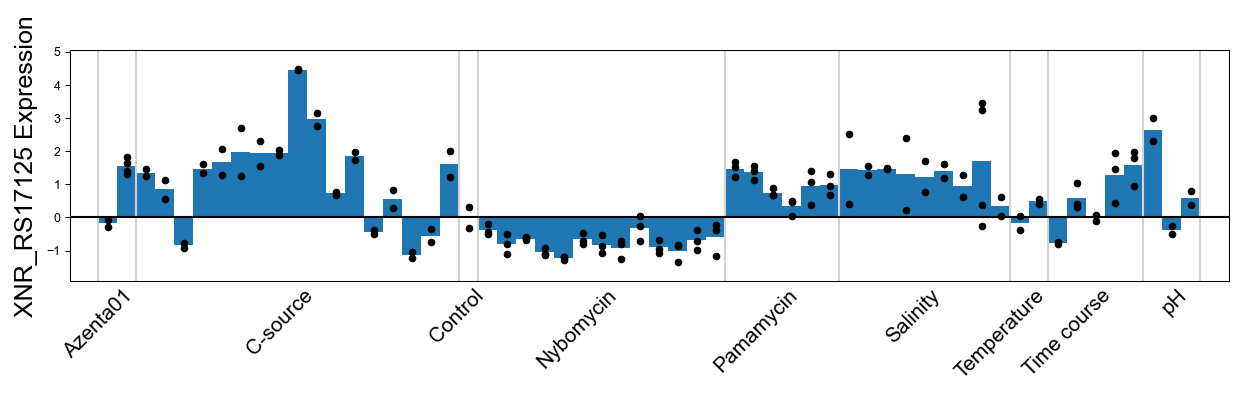

In [95]:
plot_expression(ica_data,'XNR_RS17125')

<AxesSubplot:xlabel='Salinity:ISP2 7% NaCl', ylabel='Salinity:ISP2 3% NaCl'>

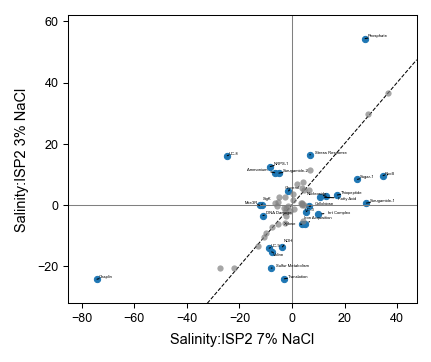

In [68]:
plot_dima(ica_data,'Salinity:ISP2 7% NaCl','Salinity:ISP2 3% NaCl', label_font_kwargs={'fontsize':12})

/Users/nilmat/miniconda3/envs/imodulon/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


<AxesSubplot:xlabel='UC-5'>

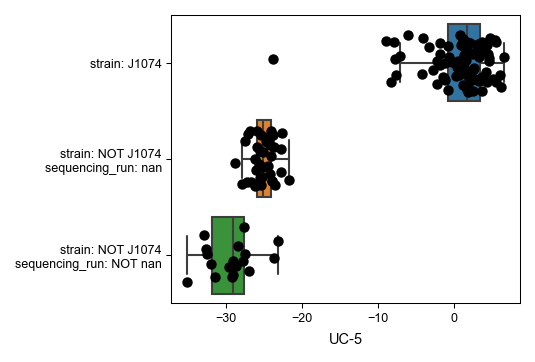

In [117]:
metadata_boxplot(ica_data,"UC-5",ignore_cols=['project', 'temperature'])

/Users/nilmat/miniconda3/envs/imodulon/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


<AxesSubplot:xlabel='Surugamide-2'>

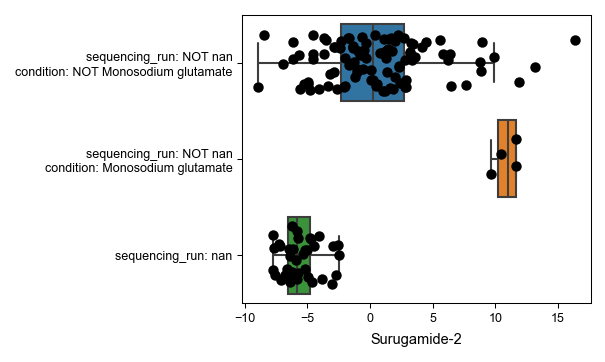

In [75]:
metadata_boxplot(ica_data,"Surugamide-2",ignore_cols=['project'])

# NRPS iron story

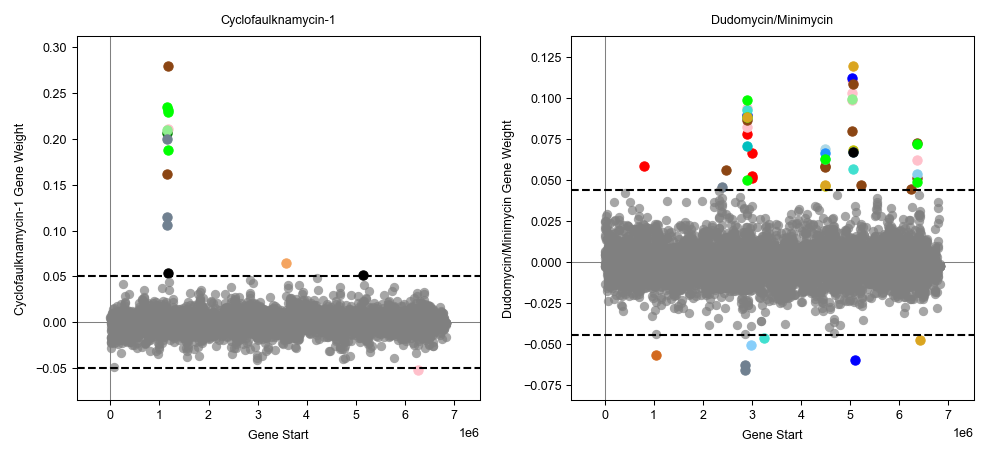

In [102]:
# Set the svg.fonttype parameter to 'none'
plt.rcParams['svg.fonttype'] = 'none'

# Convert the page size from mm to inches
width = 170 / 25.4  # ~6.69 inches
height = 80 / 25.4  # ~3.94 inches

# Define a list of imodulons
imodulons = ['Cyclofaulknamycin-1', 'Dudomycin/Minimycin']

# Create a grid of subplots with two columns
fig, axs = plt.subplots(len(imodulons)//2 + len(imodulons)%2, 2, figsize=(width, height))

# Loop over the subplots and plot the gene weights
for i, ax in enumerate(axs.flat):
    if i < len(imodulons):
        plot_gene_weights(ica_data, imodulons[i], show_labels=False, label_font_kwargs={'fontsize':6}, ax=ax, legend=False, scatter_kwargs={'s': 20})
        ax.set_title(imodulons[i], fontsize=6)

        # Increase x and y axis text size
        ax.tick_params(axis='both', which='major', labelsize=6)

        # Increase x and y axis label size
        ax.set_xlabel(ax.get_xlabel(), fontsize=6)
        ax.set_ylabel(ax.get_ylabel(), fontsize=6)
    else:
        ax.axis('off')  # Hide unused subplots

plt.tight_layout()
plt.savefig('/Users/nilmat/Desktop/preprint_figs/panel4/cyclo_dudo__weights.svg', dpi=300)
plt.show()

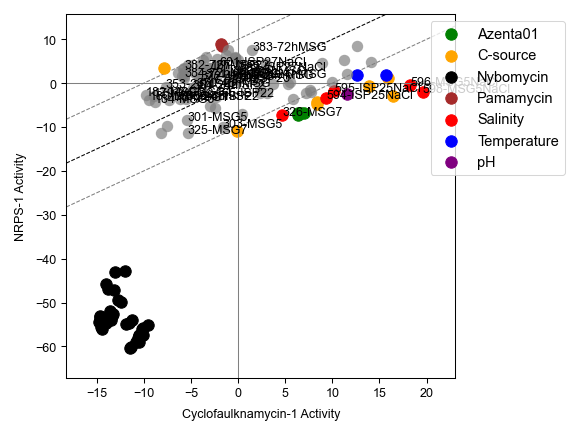

In [101]:
import matplotlib.pyplot as plt

# Convert the page size from mm to inches
width = 85 / 25.4  # ~6.69 inches
height = 80 / 25.4  # ~3.94 inches

fig, ax = plt.subplots(figsize=(width, height))

# Create a dictionary where the keys are the sample IDs and the values are the project names
groups = ica_data.sample_table['project'].to_dict()

compare_activities(ica_data,'Cyclofaulknamycin-1','BGC-General',
                   ax=ax,
                   line45=True,
                   fit_metric=None,
                   line45_margin=10,
                   groups=groups,
                   colors=['green','orange', 'purple', 'red', 'blue', 'black', 'brown', 'pink'],
                   scatter_kwargs={'s': 30})  # Increase dot size

# Get the rows for 'Surugamide-1' and 'Surugamide-2'
surugamide_1 = ica_data.A.loc['Cyclofaulknamycin-1']
surugamide_2 = ica_data.A.loc['BGC-General']

# Loop over the columns in the DataFrame (these are the sample names)
for sample in ica_data.A.columns:
    # Check if the sample belongs to the 'Salinity' or 'Time course' group
    if groups[sample] in ['Salinity', 'Time course']:
        # Get the values for this sample
        x = surugamide_1[sample]
        y = surugamide_2[sample]
        # Add a label for each point
        ax.annotate(sample, (x, y), fontsize=6)

# Increase x and y axis text size
ax.tick_params(axis='both', which='major', labelsize=6)

# Increase the x and y-axis label size
ax.set_xlabel('Cyclofaulknamycin-1 Activity', fontsize=6)
ax.set_ylabel('NRPS-1 Activity', fontsize=6)

# Move the legend to the top right outside the plot
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.savefig('/Users/nilmat/Desktop/preprint_figs/panel3/NRPS_phase2.svg')

In [158]:
ica_data.sample_table

,sample_id,strain,benchling_strain_id,project,condition,incubation_time,temperature,special_condition,od_600,notes,...,passed_fastqc,passed_reads_mapped_to_CDS,passed_global_correlation,skip,reference_condition,full_condition_name,passed_replicate_correlations,contamination,replicate,sample
Control1-MSG,Control1-MSG,J1074,NaN,Control,control,30h,30C,Beads,2.7,sample_id: (carbon source)-(biological replica...,...,True,True,True,False,control,azenta:control,True,False,1,azenta:control:1
Control2-MSG,Control2-MSG,J1074,NaN,Control,control,30h,30C,Spring,3.3,sample_id: (carbon source)-(biological replica...,...,True,True,True,False,control,azenta:control,True,False,2,azenta:control:2
L-galactose-1,L-galactose-1,J1074,NaN,Azenta01,L-galactose,NaN,30C,Na,NaN,"Samples were mistakenly labelled ""L-glutamate""...",...,True,True,True,False,control,azenta:L-galactose,True,False,1,azenta:L-galactose:1
L-galactose-2,L-galactose-2,J1074,NaN,Azenta01,L-galactose,NaN,30C,Na,NaN,"Samples were mistakenly labelled ""L-glutamate""...",...,True,True,True,False,control,azenta:L-galactose,True,False,2,azenta:L-galactose:2
MSG-1A,MSG-1A,J1074,NaN,Azenta01,Monosodium glutamate,NaN,30C,Na,NaN,sample_id: (carbon source)-(biological replica...,...,True,True,True,False,control,azenta:Monosodium glutamate,True,False,1,azenta:Monosodium glutamate:1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRX10298369,SRX10298369,J1074/R2_Delta-bkdR,NaN,Pamamycin,pp_30h_bkdR_L_valanine,30h,Na,Na,NaN,NaN,...,True,True,True,False,control,azenta:pp_30h_bkdR_L_valanine,True,False,2,azenta:pp_30h_bkdR_L_valanine:2
SRX10298370,SRX10298370,J1074/R2_Delta-bkdR,NaN,Pamamycin,pp_30h_bkdR_L_valanine,30h,Na,Na,NaN,NaN,...,True,True,True,False,control,azenta:pp_30h_bkdR_L_valanine,True,False,3,azenta:pp_30h_bkdR_L_valanine:3
SRX10298362,SRX10298362,J1074/R2,NaN,Pamamycin,pp_30h_L_valanine,30h,Na,Na,NaN,NaN,...,True,True,True,False,control,azenta:pp_30h_L_valanine,True,False,1,azenta:pp_30h_L_valanine:1
SRX10298363,SRX10298363,J1074/R2,NaN,Pamamycin,pp_30h_L_valanine,30h,Na,Na,NaN,NaN,...,True,True,True,False,control,azenta:pp_30h_L_valanine,True,False,2,azenta:pp_30h_L_valanine:2


/Users/nilmat/miniconda3/envs/imodulon/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


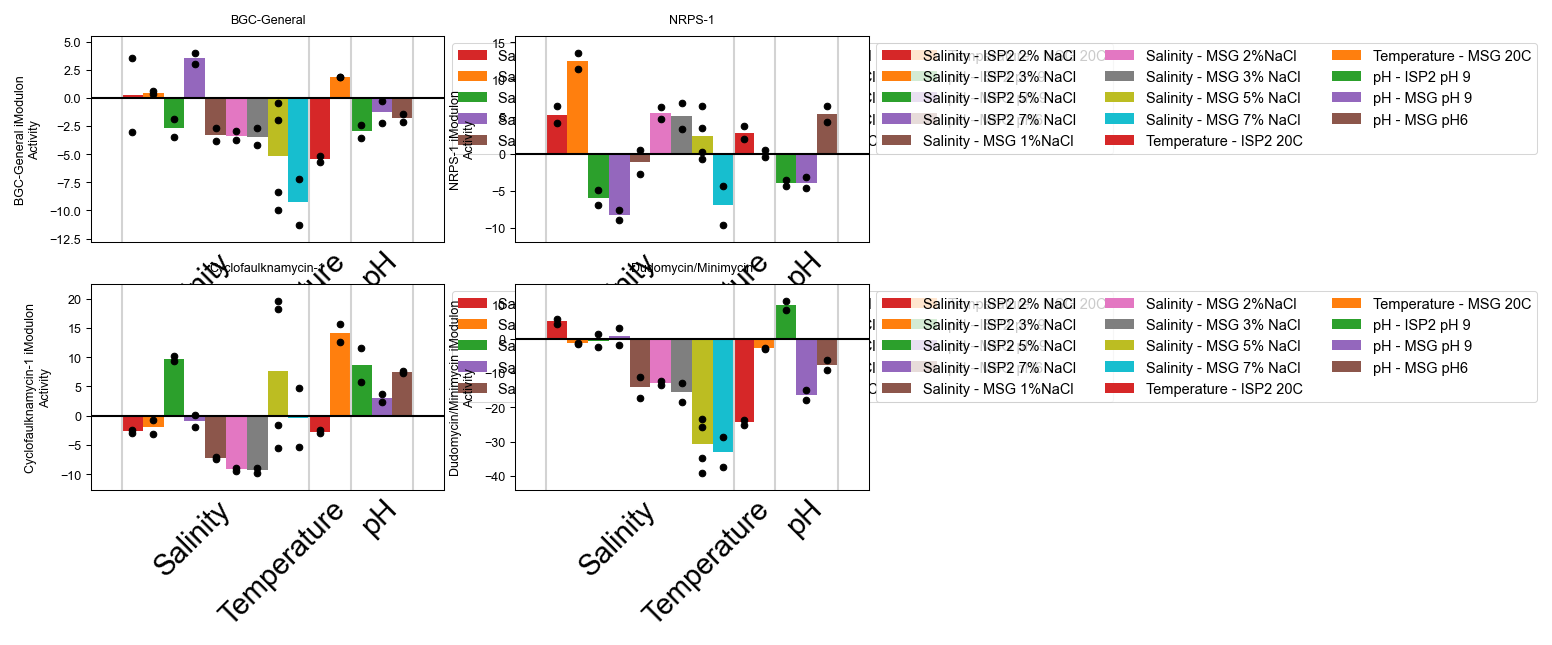

In [180]:
# Set the svg.fonttype parameter to 'none'
plt.rcParams['svg.fonttype'] = 'none'

# Convert the page size from mm to inches
width = 170 / 25.4  # ~6.69 inches
height = 100 / 25.4  # ~3.94 inches

# Define a list of imodulons
imodulons = ['BGC-General', 'NRPS-1', 'Cyclofaulknamycin-1', 'Dudomycin/Minimycin']

# Create a grid of subplots with two columns
fig, axs = plt.subplots(len(imodulons)//2 + len(imodulons)%2, 2, figsize=(width, height))

# Loop over the subplots and plot the activities
for i, ax in enumerate(axs.flat):
    if i < len(imodulons):
        plot_activities(ica_data, imodulons[i], projects=['Salinity', 'Temperature','pH'], highlight=['Salinity', 'Temperature','pH'], ax=ax)
        ax.set_title(imodulons[i], fontsize=6)

        # Increase x and y axis text size
        ax.tick_params(axis='both', which='major', labelsize=6)

        # Increase x and y axis label size
        ax.set_xlabel(ax.get_xlabel(), fontsize=6)
        ax.set_ylabel(ax.get_ylabel(), fontsize=6)

        # Remove legend
        #if ax.get_legend():
            #ax.get_legend().remove()
    else:
        ax.axis('off')  # Hide unused subplots

plt.tight_layout()
plt.savefig(path.join('../../../../Desktop/preprint_figs/Supp_fig_NRPS.svg'), dpi=300)
plt.show()

# Panel 5: Uncharacterized iModulons

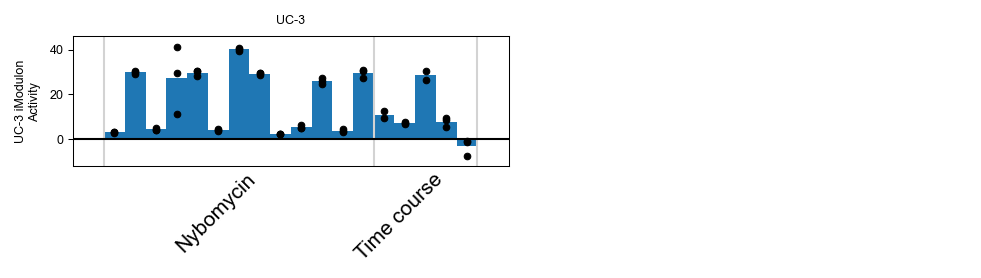

In [109]:
# Set the svg.fonttype parameter to 'none'
plt.rcParams['svg.fonttype'] = 'none'

# Convert the page size from mm to inches
width = 170 / 25.4  # ~6.69 inches
height = 50 / 25.4  # ~3.94 inches

# Define a list of imodulons
imodulons = ['UC-3']

# Create a grid of subplots with two columns
fig, axs = plt.subplots(len(imodulons)//2 + len(imodulons)%2, 2, figsize=(width, height))

# Loop over the subplots and plot the activities
for i, ax in enumerate(axs.flat):
    if i < len(imodulons):
        plot_activities(ica_data, imodulons[i], projects=['Time course', 'Nybomycin'], ax=ax)
        ax.set_title(imodulons[i], fontsize=6)

        # Increase x and y axis text size
        ax.tick_params(axis='both', which='major', labelsize=6)

        # Increase x and y axis label size
        ax.set_xlabel(ax.get_xlabel(), fontsize=6)
        ax.set_ylabel(ax.get_ylabel(), fontsize=6)

        # Remove legend
        if ax.get_legend():
            ax.get_legend().remove()
    else:
        ax.axis('off')  # Hide unused subplots

plt.tight_layout()
plt.savefig('/Users/nilmat/Desktop/preprint_figs/panel5/UC-3_activities.svg', dpi=300)
plt.show()

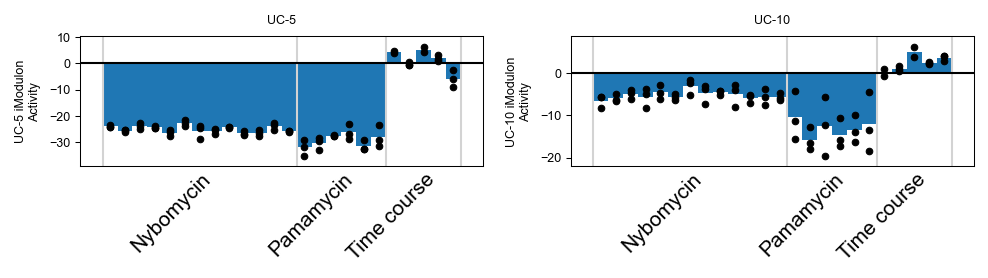

In [115]:
# Set the svg.fonttype parameter to 'none'
plt.rcParams['svg.fonttype'] = 'none'

# Convert the page size from mm to inches
width = 170 / 25.4  # ~6.69 inches
height = 50 / 25.4  # ~3.94 inches

# Define a list of imodulons
imodulons = ['UC-5', 'UC-10']

# Create a grid of subplots with two columns
fig, axs = plt.subplots(len(imodulons)//2 + len(imodulons)%2, 2, figsize=(width, height))

# Loop over the subplots and plot the activities
for i, ax in enumerate(axs.flat):
    if i < len(imodulons):
        plot_activities(ica_data, imodulons[i], projects=['Time course', 'Nybomycin', 'Pamamycin'], ax=ax)
        ax.set_title(imodulons[i], fontsize=6)

        # Increase x and y axis text size
        ax.tick_params(axis='both', which='major', labelsize=6)

        # Increase x and y axis label size
        ax.set_xlabel(ax.get_xlabel(), fontsize=6)
        ax.set_ylabel(ax.get_ylabel(), fontsize=6)

        # Remove legend
        if ax.get_legend():
            ax.get_legend().remove()
    else:
        ax.axis('off')  # Hide unused subplots

plt.tight_layout()
plt.savefig('/Users/nilmat/Desktop/preprint_figs/panel5/UC-5_10_activities.svg', dpi=300)
plt.show()

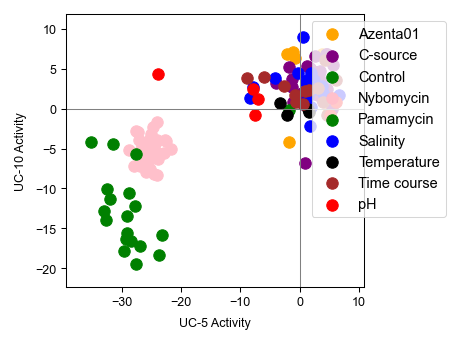

In [120]:
import matplotlib.pyplot as plt

# Convert the page size from mm to inches
width = 65 / 25.4  # ~6.69 inches
height = 60 / 25.4  # ~3.94 inches

fig, ax = plt.subplots(figsize=(width, height))

# Create a dictionary where the keys are the sample IDs and the values are the project names
groups = ica_data.sample_table['project'].to_dict()

compare_activities(ica_data,'UC-5','UC-10',
                   ax=ax,
                   line45=False,
                   fit_metric=None,
                   line45_margin=10,
                   groups=groups,
                   colors=['green','orange', 'purple', 'red', 'blue', 'black', 'brown', 'pink'],
                   scatter_kwargs={'s': 30})  # Increase dot size

# Get the rows for 'Surugamide-1' and 'Surugamide-2'
surugamide_1 = ica_data.A.loc['UC-5']
surugamide_2 = ica_data.A.loc['UC-10']

# Loop over the columns in the DataFrame (these are the sample names)
for sample in ica_data.A.columns:
    # Check if the sample belongs to the 'Salinity' or 'Time course' group
    if groups[sample] in []:
        # Get the values for this sample
        x = surugamide_1[sample]
        y = surugamide_2[sample]
        # Only annotate and plot the point if both x and y are greater than 0
        if x > 0 and y > 0:
            # Add a label for each point
            ax.annotate(sample, (x, y), fontsize=6)

# Increase x and y axis text size
ax.tick_params(axis='both', which='major', labelsize=6)

# Increase the x and y-axis label size
ax.set_xlabel('UC-5 Activity', fontsize=6)
ax.set_ylabel('UC-10 Activity', fontsize=6)

# Move the legend to the top right outside the plot
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.savefig('/Users/nilmat/Desktop/preprint_figs/panel5/phase.svg')

In [113]:
ica_data.view_imodulon('UC-10')

,gene_weight,gene_name,eggNOG_OGs,Description,GOs,EC,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,...,BiGG_Reaction,PFAMs,accession,old_locus_tag,start,end,strand,gene_product,COG,operon
XNR_RS30400,-0.040253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NC_020990.1,XNR_0033,49636,49791,+,hypothetical protein,X,Op24
XNR_RS00250,-0.041113,XNR_RS00250,"COG0477@1|root,COG0477@2|Bacteria,2GIYR@201174...",Major facilitator superfamily,-,-,-,-,-,-,...,-,Sugar_tr,NC_020990.1,XNR_0053,66443,67870,+,MFS transporter,Amino acid transport and metabolism,Op41
XNR_RS00900,0.048766,XNR_RS00900,"COG0500@1|root,COG2226@2|Bacteria,2GK7A@201174...",methyltransferase,-,-,-,-,-,-,...,-,Methyltransf_11,NC_020990.1,XNR_0185,221513,222112,+,methyltransferase domain-containing protein,"Secondary metabolites biosynthesis, transport ...",Op145
XNR_RS00915,-0.047712,XNR_RS00915,"COG3509@1|root,COG3509@2|Bacteria,2I34B@201174...",Tannase and feruloyl esterase,-,-,-,-,-,-,...,-,"3HBOH,Tannase",NC_020990.1,XNR_0188,224222,225634,+,tannase/feruloyl esterase family alpha/beta hy...,"Secondary metabolites biosynthesis, transport ...",Op148
XNR_RS01160,0.055884,XNR_RS01160,"COG5502@1|root,COG5502@2|Bacteria,2IHPZ@201174...",Uncharacterized conserved protein (DUF2267),-,-,-,-,-,-,...,-,DUF2267,NC_020990.1,XNR_0237,293276,293713,+,DUF2267 domain-containing protein,"Posttranslational modification, protein turnov...",Op188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XNR_RS28490,-0.041788,XNR_RS28490,"COG0346@1|root,COG0346@2|Bacteria,2I9G1@201174...",lactoylglutathione lyase activity,-,-,-,-,-,-,...,-,-,NC_020990.1,XNR_5746,6478030,6478407,-,VOC family protein,Amino acid transport and metabolism,Op4295
XNR_RS31415,-0.043844,XNR_RS31415,"COG1878@1|root,COG1878@2|Bacteria,2GJ59@201174...",Putative cyclase,-,-,-,-,-,-,...,-,Cyclase,NC_020990.1,NaN,6496239,6496463,-,hypothetical protein,Function unknown,Op4308
XNR_RS28615,0.047928,XNR_RS28615,"COG1120@1|root,COG1120@2|Bacteria,2HETC@201174...",ABC transporter,-,3.6.3.34,ko:K02013,"ko02010,map02010",M00240,-,...,-,ABC_tran,NC_020990.1,XNR_5771,6503220,6504056,+,ABC transporter ATP-binding protein,Coenzyme transport and metabolism,Op4314
XNR_RS28925,-0.045284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NC_020990.1,XNR_5836,6569653,6569844,+,hypothetical protein,X,Op4354


In [107]:
for imodulon in ['UC-3', 'UC-5', 'UC-10']:
    df = ica_data.view_imodulon(imodulon)

    # Identify the genes with unknown function
    unknown_genes = df[df['COG'].isin(['-', 'X', 'function unknown'])]

    # Count the number of uncharacterized genes
    unknown_genes_count = len(unknown_genes)

    # Count the total number of genes
    total_genes_count = len(df)

    # Calculate the percentage of genes with unknown function
    percentage_unknown = (unknown_genes_count / total_genes_count) * 100

    print(f'{imodulon} contains {percentage_unknown:.2f}% uncharacterized genes')

UC-3 contains 18.75% uncharacterized genes
UC-5 contains 66.67% uncharacterized genes
UC-10 contains 34.44% uncharacterized genes


# Supplemental Figure 3

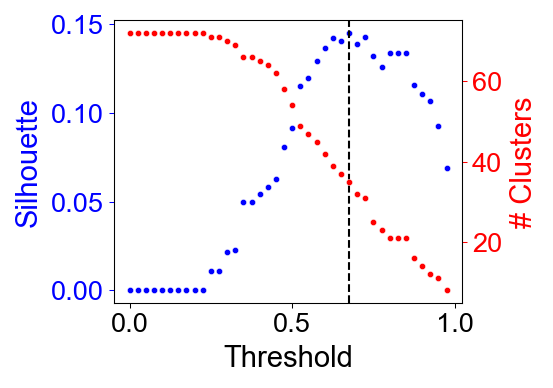

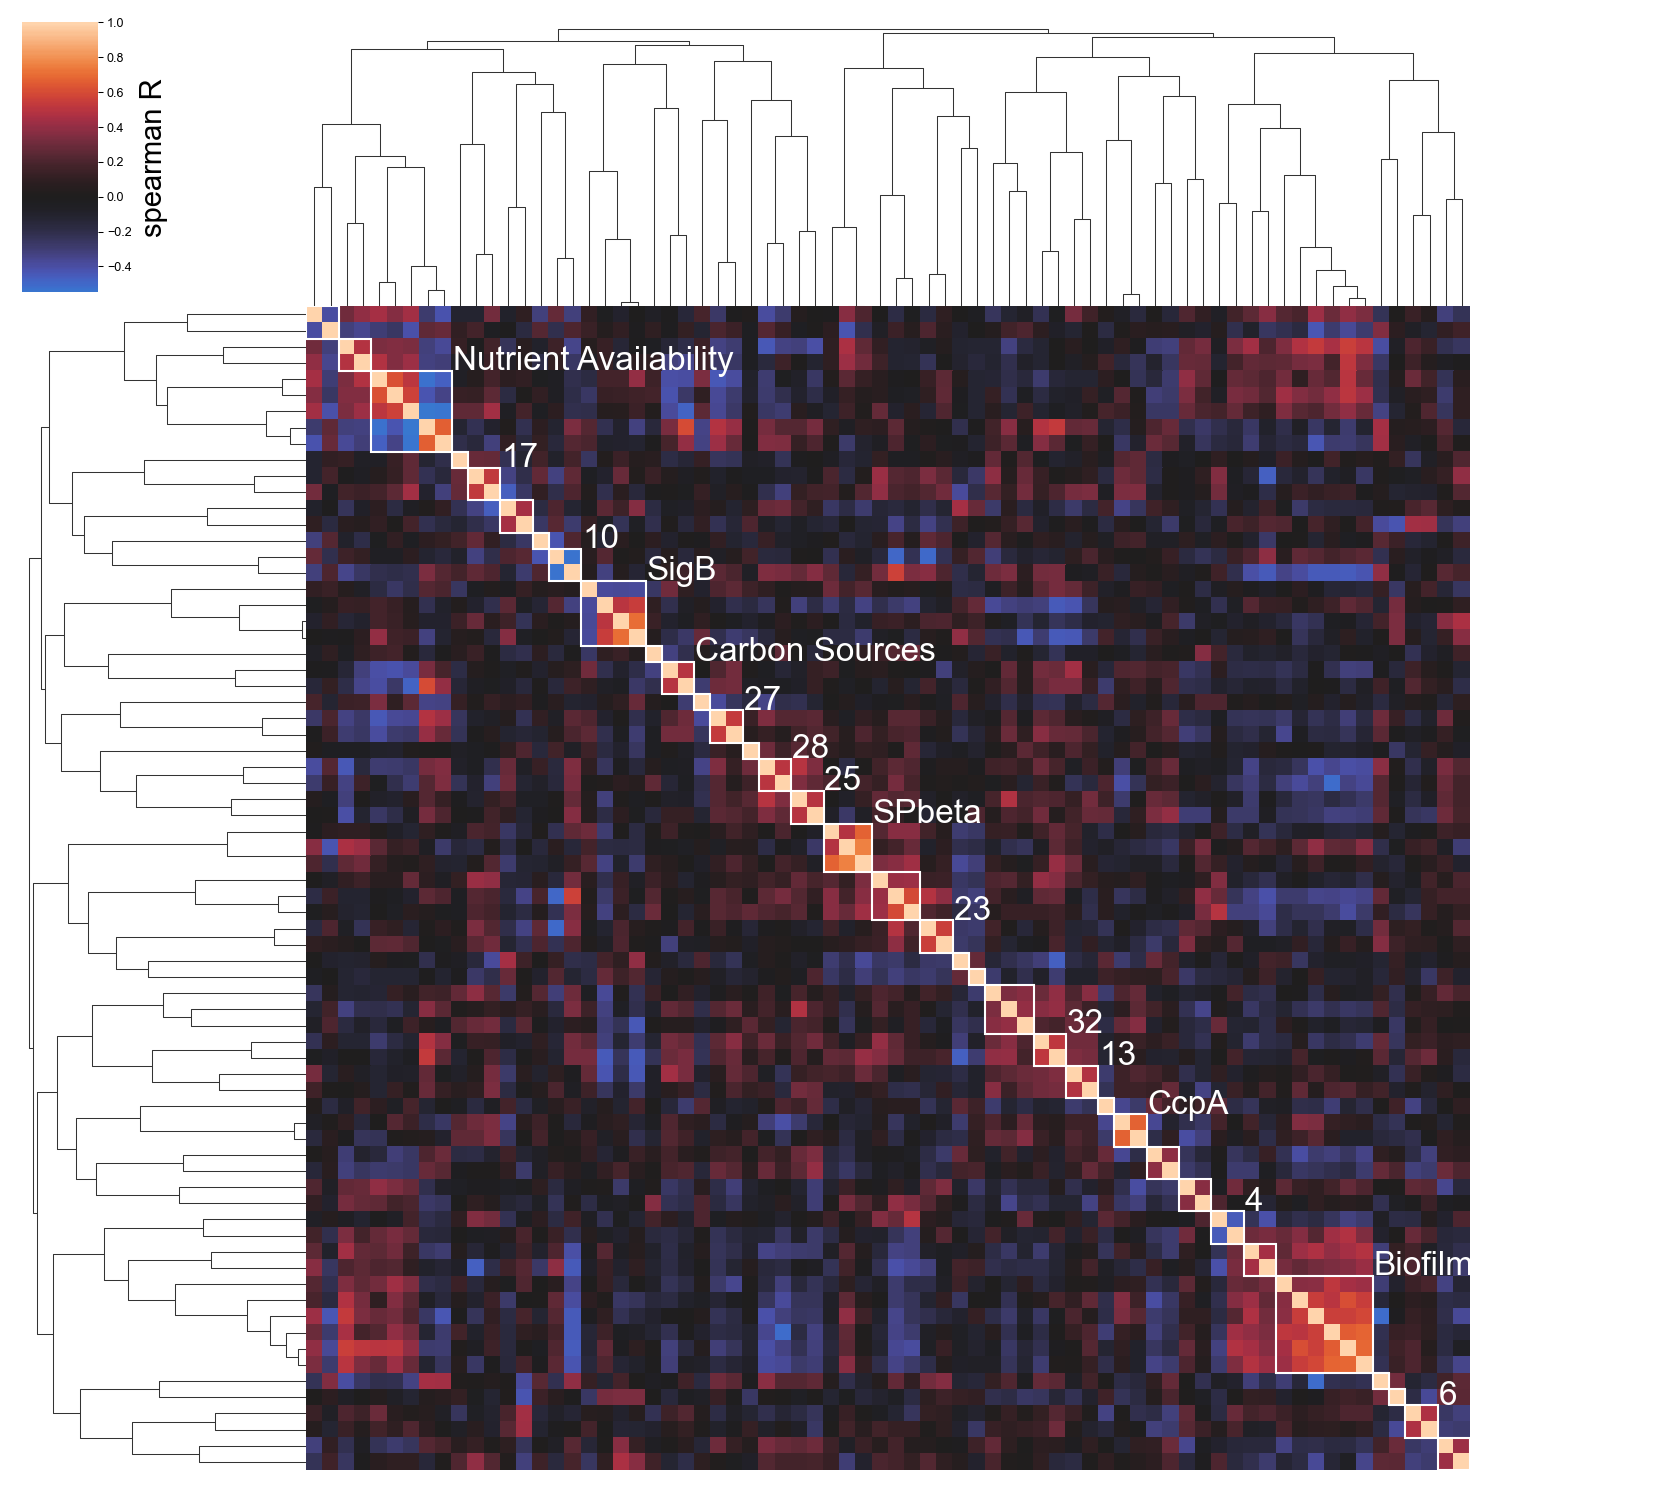

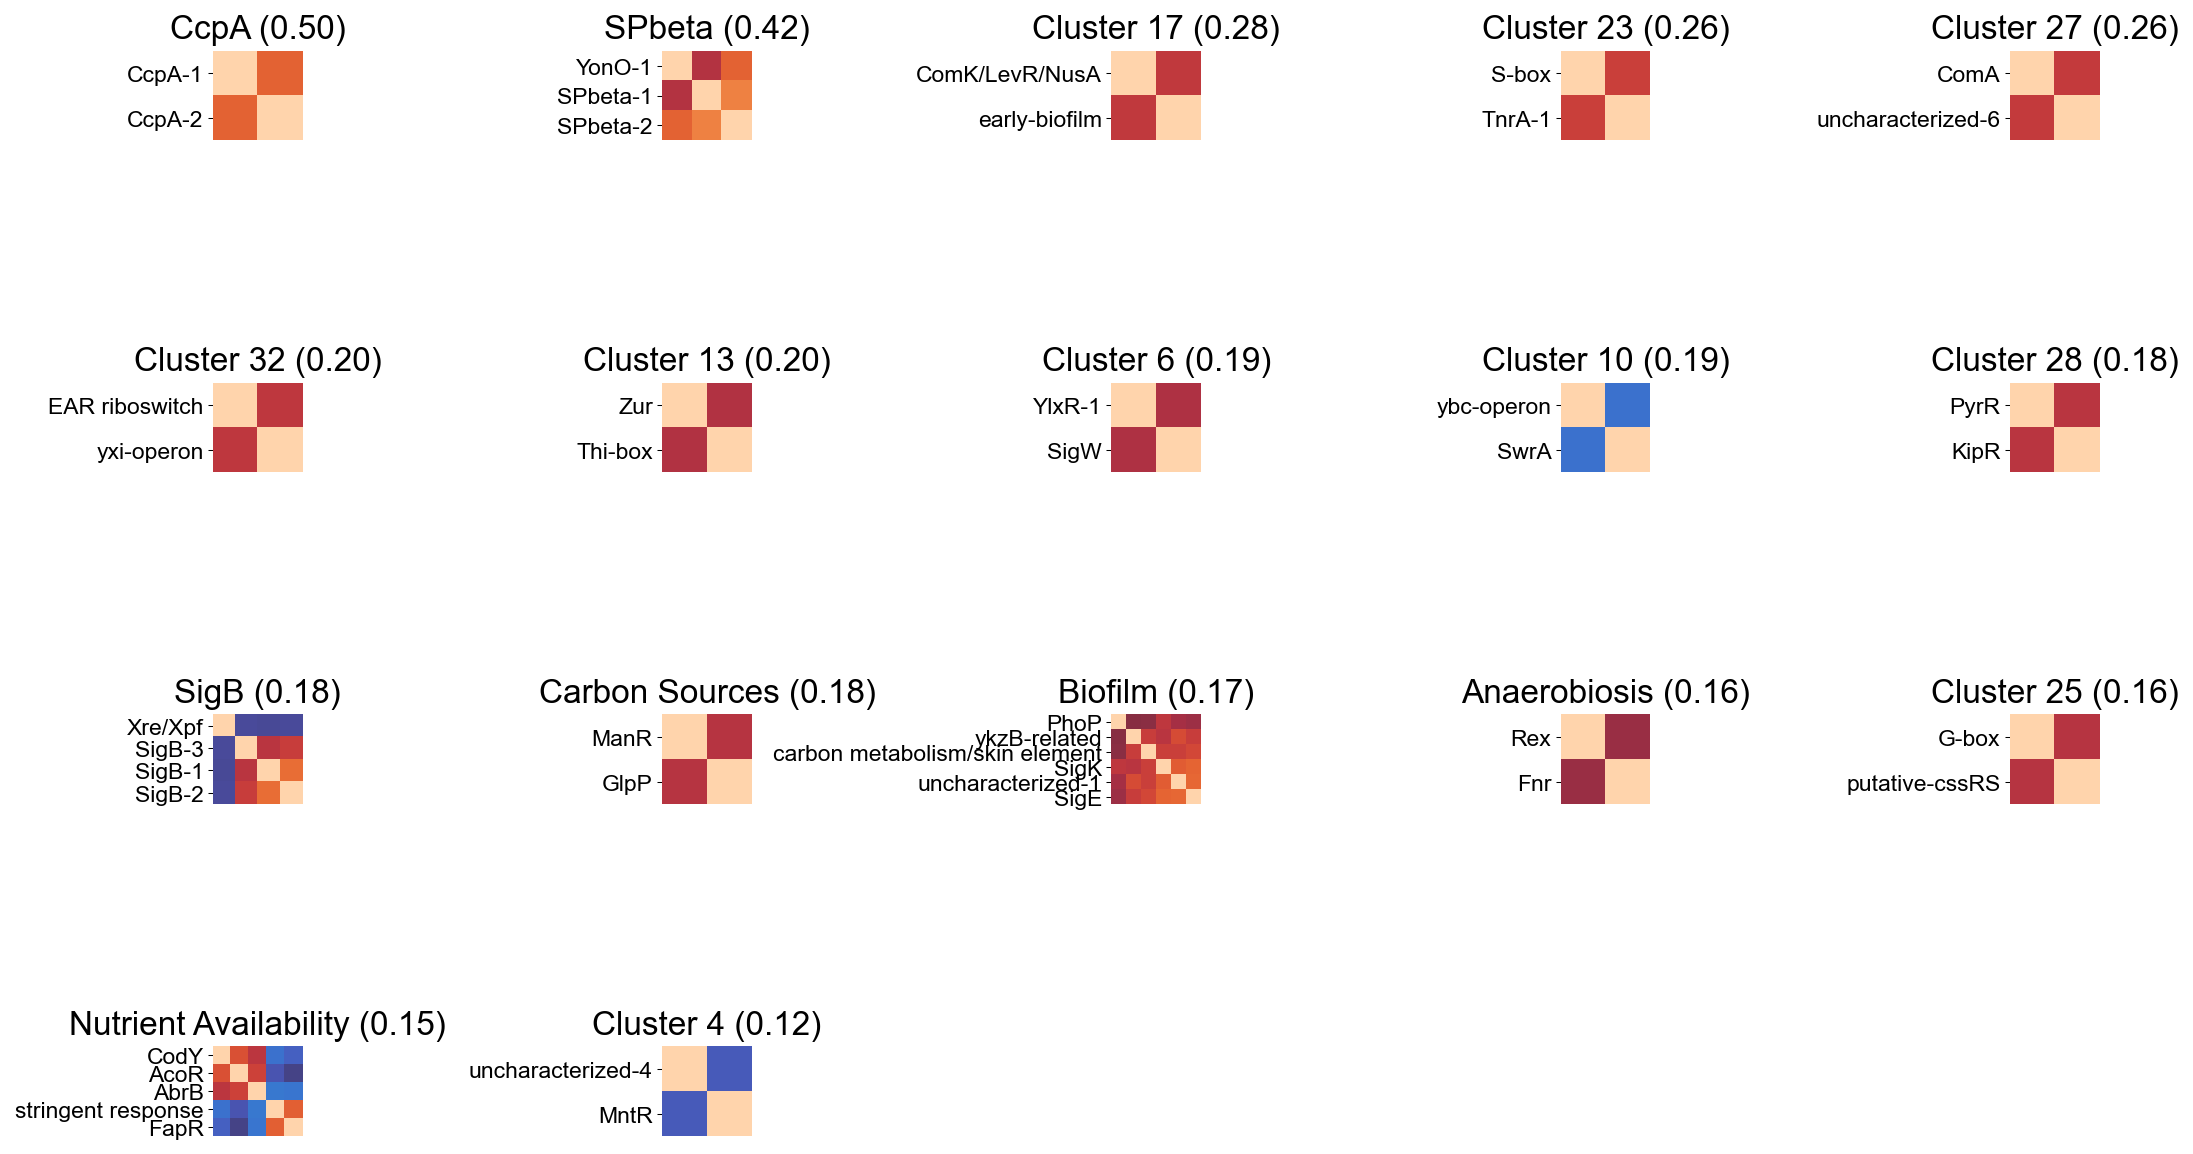

In [22]:
cmap,cg = cluster_activities(ica_data, show_best_clusters=True,show_thresholding=True,
                             cluster_names={14:'CcpA',11:'SPbeta',1:'SigB',3:'Biofilm',9:'Carbon Sources',16:'Anaerobiosis',2:'Nutrient Availability'},
                             return_clustermap=True)

cg.savefig(path.join('raw_figures','FigS3a_clustermap.png'))    
plt.savefig(path.join('raw_figures','FigS3b_clustermap.png'))